In [2]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


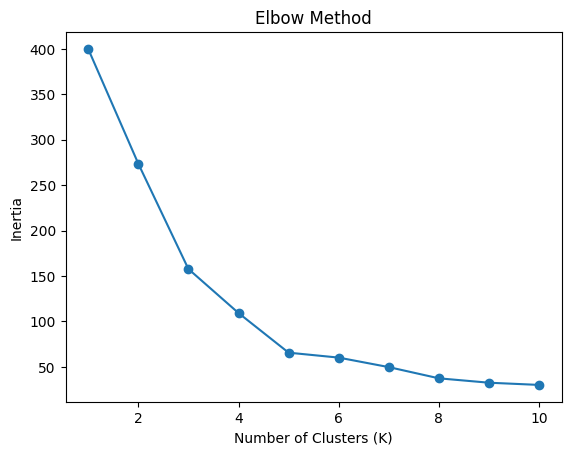

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters


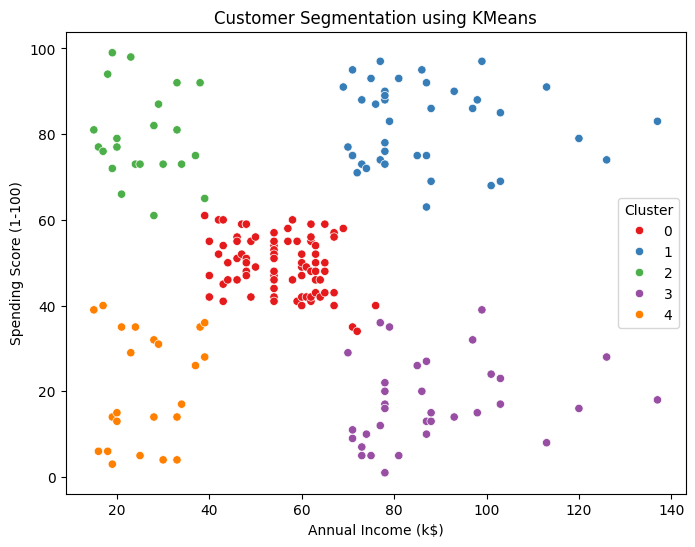

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set1'
)
plt.title("Customer Segmentation using KMeans")
plt.show()


In [13]:
data.to_csv("Segmented_Customers.csv", index=False)
